## VOC analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_5982/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading and preprocessing the data

In [3]:
voc_df = pd.read_csv('data/voc_2010-2022.csv')

In [4]:
voc_df.head()

,Unnamed: 0,Datetime,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
0,0,2010-05-28 17:22:00,47.81872,-2.07877,-1.91743,-1.50219
1,1,2010-05-28 20:22:00,9.34395,0.66285,-3.22838,0.39991
2,2,2010-05-28 23:22:00,10.63157,-1.77225,-3.11930,-0.03744
3,3,2010-05-29 02:22:00,12.27364,-2.02885,-2.26063,-0.53726
4,4,2010-05-29 05:22:00,19.89456,-2.66424,NaN,0.64042


In [5]:
voc_df.shape

(15854, 6)

In [6]:
voc_df.dtypes

Unnamed: 0             int64
Datetime              object
monoterpene_flux     float64
methanol_flux        float64
acetone_flux         float64
acetaldehyde_flux    float64
dtype: object

In [7]:
voc_df.columns

Index(['Unnamed: 0', 'Datetime', 'monoterpene_flux', 'methanol_flux',
       'acetone_flux', 'acetaldehyde_flux'],
      dtype='object')

In [8]:
# drop the "Unnamed: 0" column
voc_df = voc_df.drop(columns=['Unnamed: 0'])
# convert the "date" column to datetime
voc_df['date'] = pd.to_datetime(voc_df['Datetime'])
# set the "date" column as the index
voc_df = voc_df.set_index('date')
# drop the "Datetime" column
voc_df = voc_df.drop(columns=['Datetime'])

In [9]:
voc_df.head()

,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
date,,,,
2010-05-28 17:22:00,47.81872,-2.07877,-1.91743,-1.50219
2010-05-28 20:22:00,9.34395,0.66285,-3.22838,0.39991
2010-05-28 23:22:00,10.63157,-1.77225,-3.11930,-0.03744
2010-05-29 02:22:00,12.27364,-2.02885,-2.26063,-0.53726
2010-05-29 05:22:00,19.89456,-2.66424,NaN,0.64042


### Descriptive statistics

In [10]:
voc_df.describe()

,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
count,14804.000000,15210.000000,15375.000000,12661.000000
mean,38.926624,6.301478,4.375773,1.303580
std,132.923900,36.276722,19.370071,12.632154
min,-1094.300000,-705.170000,-254.970000,-606.300000
25%,1.871120,-9.531327,-4.069410,-3.407200
50%,15.862500,1.122000,0.721860,0.408980
75%,48.315500,16.189250,8.263750,5.032920
max,5889.800000,363.520000,293.470000,140.070000


In [11]:
# find the number of missing values in each column
voc_df.isnull().sum()

monoterpene_flux     1050
methanol_flux         644
acetone_flux          479
acetaldehyde_flux    3193
dtype: int64

In [12]:
# calculate the percentage of missing values in each column
voc_df.isnull().mean() * 100

monoterpene_flux      6.622934
methanol_flux         4.062066
acetone_flux          3.021320
acetaldehyde_flux    20.140028
dtype: float64

In [13]:
# calculate correlation matrix
correlation_matrix = voc_df.corr()
correlation_matrix

,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
monoterpene_flux,1.000000,0.193196,0.347062,0.296838
methanol_flux,0.193196,1.000000,0.484151,0.411868
acetone_flux,0.347062,0.484151,1.000000,0.432147
acetaldehyde_flux,0.296838,0.411868,0.432147,1.000000


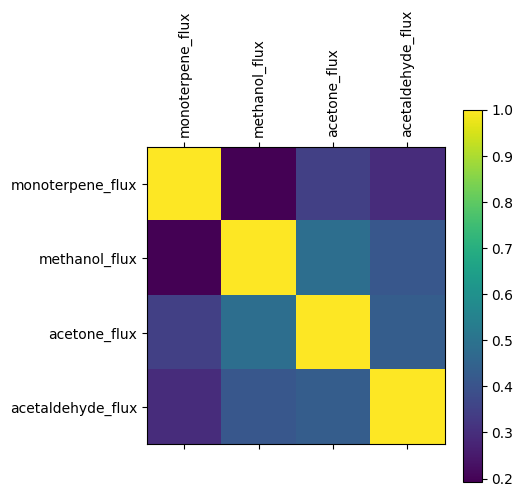

In [14]:
# plot the correlation matrix
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


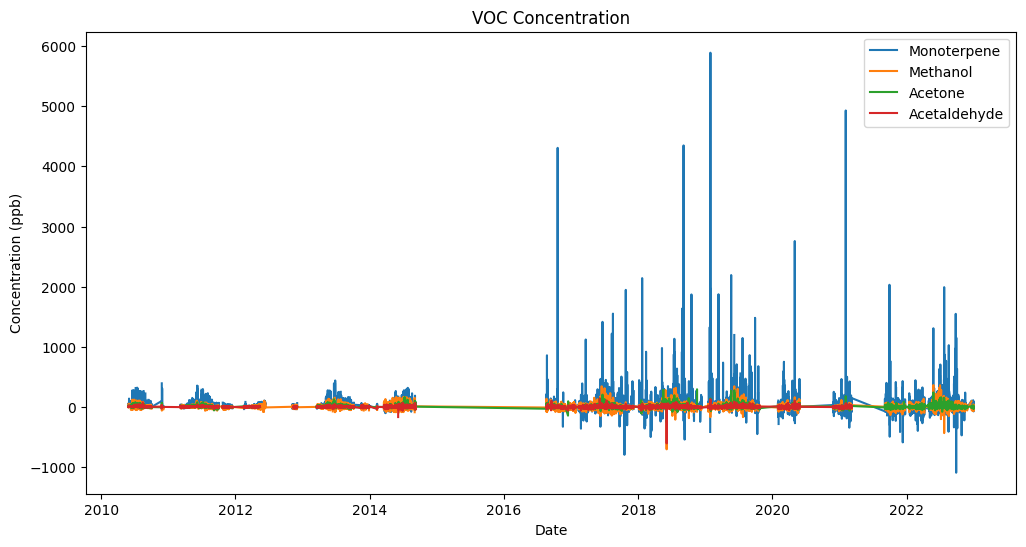

In [15]:
# plot the time series of the VOC concentration
plt.figure(figsize=(12, 6))
plt.plot(voc_df['monoterpene_flux'], label='Monoterpene')
plt.plot(voc_df['methanol_flux'], label='Methanol')
plt.plot(voc_df['acetone_flux'], label='Acetone')
plt.plot(voc_df['acetaldehyde_flux'], label='Acetaldehyde')
plt.title('VOC Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration (ppb)')
plt.legend()
plt.show()


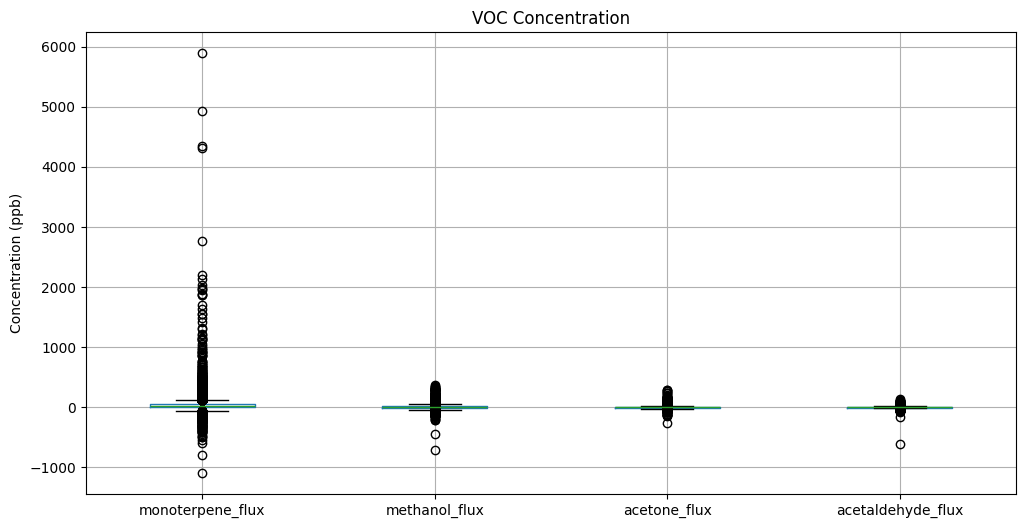

In [17]:
# plot the time series of the VOC concentration as a boxplot
plt.figure(figsize=(12, 6))
voc_df.boxplot(column=['monoterpene_flux', 'methanol_flux', 'acetone_flux', 'acetaldehyde_flux'])
plt.title('VOC Concentration')
plt.ylabel('Concentration (ppb)')
plt.show()

### Averaging daily

In [28]:
# take daily averages of the VOC concentration
voc_daily = voc_df.resample('D').mean()
voc_daily.head()


,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
date,,,,
2010-05-28,22.598080,-1.062723,-2.755037,-0.379907
2010-05-29,15.633765,3.231148,4.274000,2.796232
2010-05-30,23.148101,14.252623,0.654239,1.739013
2010-05-31,42.020850,25.304985,6.655295,3.157963
2010-06-01,54.729205,35.743562,13.563225,10.182586


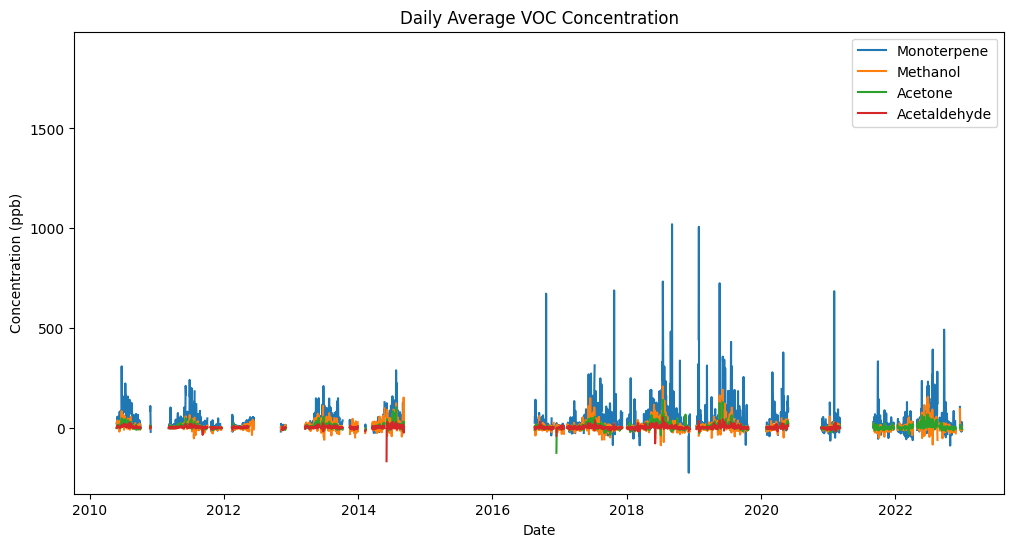

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(voc_daily['monoterpene_flux'], label='Monoterpene')
plt.plot(voc_daily['methanol_flux'], label='Methanol')
plt.plot(voc_daily['acetone_flux'], label='Acetone')
plt.plot(voc_daily['acetaldehyde_flux'], label='Acetaldehyde')
plt.title('Daily Average VOC Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration (ppb)')
plt.legend()
plt.show()

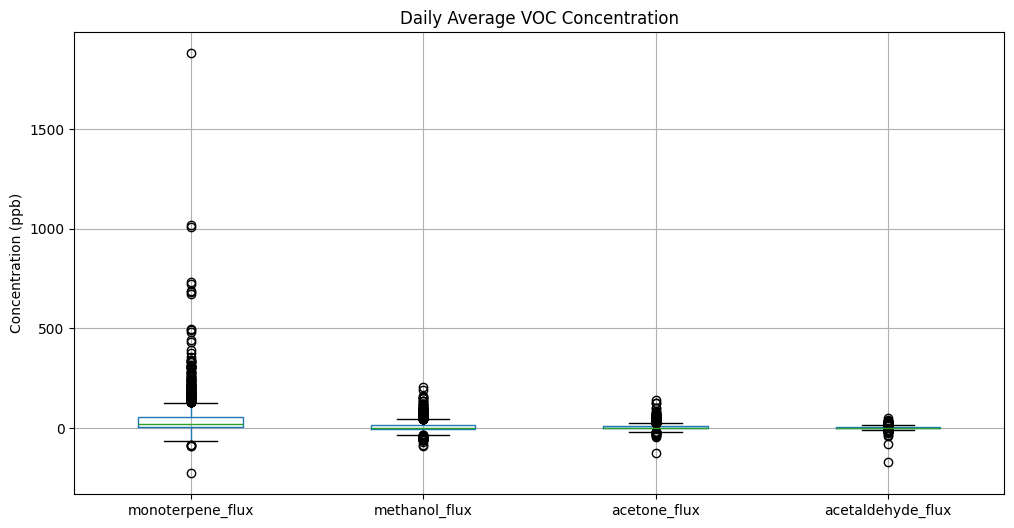

In [30]:
plt.figure(figsize=(12, 6))
voc_daily.boxplot(column=['monoterpene_flux', 'methanol_flux', 'acetone_flux', 'acetaldehyde_flux'])
plt.title('Daily Average VOC Concentration')
plt.ylabel('Concentration (ppb)')
plt.show()

### Averaging monthly

In [37]:
# take monthly averages of the VOC concentration
voc_monthly = voc_df.resample('ME').mean()
voc_monthly.head()

,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
date,,,,
2010-05-31,25.416085,12.598373,2.743635,2.008649
2010-06-30,73.983493,24.146687,12.054399,5.020212
2010-07-31,113.258477,28.117600,21.740744,9.506929
2010-08-31,73.210875,10.734172,9.513922,5.129237
2010-09-30,34.914151,1.506185,-2.420466,1.028728


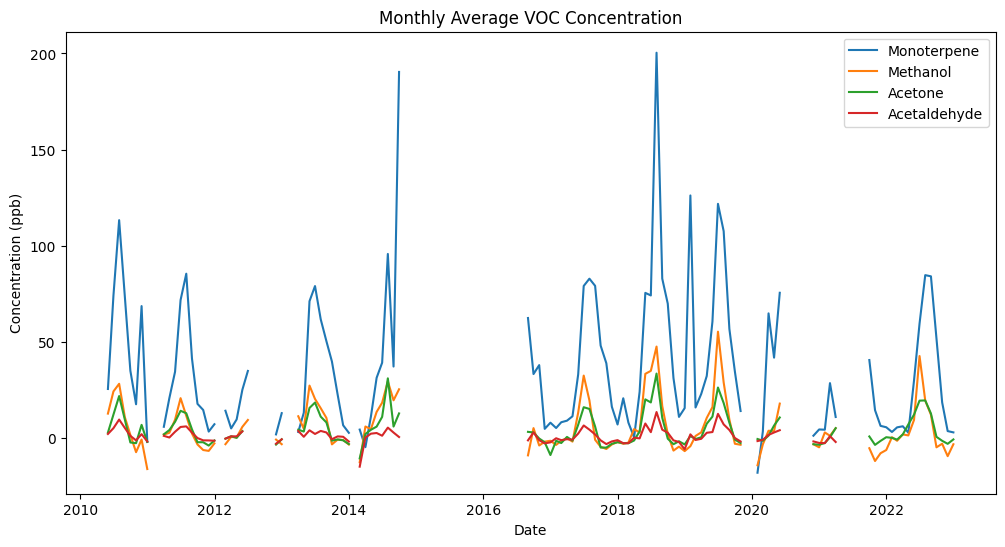

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(voc_monthly['monoterpene_flux'], label='Monoterpene')
plt.plot(voc_monthly['methanol_flux'], label='Methanol')
plt.plot(voc_monthly['acetone_flux'], label='Acetone')
plt.plot(voc_monthly['acetaldehyde_flux'], label='Acetaldehyde')
plt.title('Monthly Average VOC Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration (ppb)')
plt.legend()
plt.show()

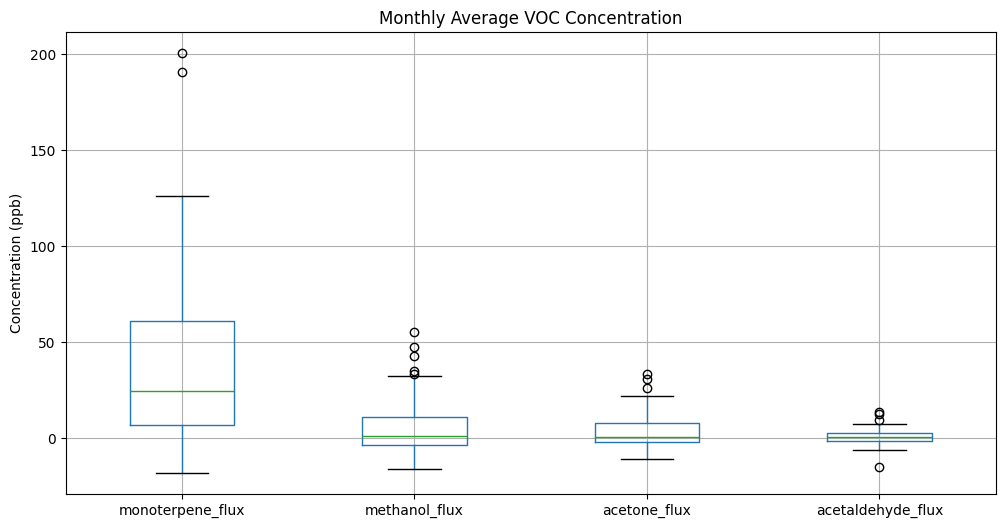

In [33]:
plt.figure(figsize=(12, 6))
voc_monthly.boxplot(column=['monoterpene_flux', 'methanol_flux', 'acetone_flux', 'acetaldehyde_flux'])
plt.title('Monthly Average VOC Concentration')
plt.ylabel('Concentration (ppb)')
plt.show()

### Hot & dry Summer 2018

In [34]:
# take summer months from year 2018 and daily averages of the VOC concentration
voc_summer_2018 = voc_df['2018-06-01':'2018-08-31'].resample('D').mean()
voc_summer_2018.head()

,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
date,,,,
2018-06-01,49.852714,86.914429,36.210757,7.325743
2018-06-02,110.511667,65.108833,21.409333,12.057083
2018-06-03,48.718500,67.873375,30.641950,6.830788
2018-06-04,24.100143,-57.574429,-32.526357,-79.137571
2018-06-05,41.145050,23.408296,6.268105,8.907050


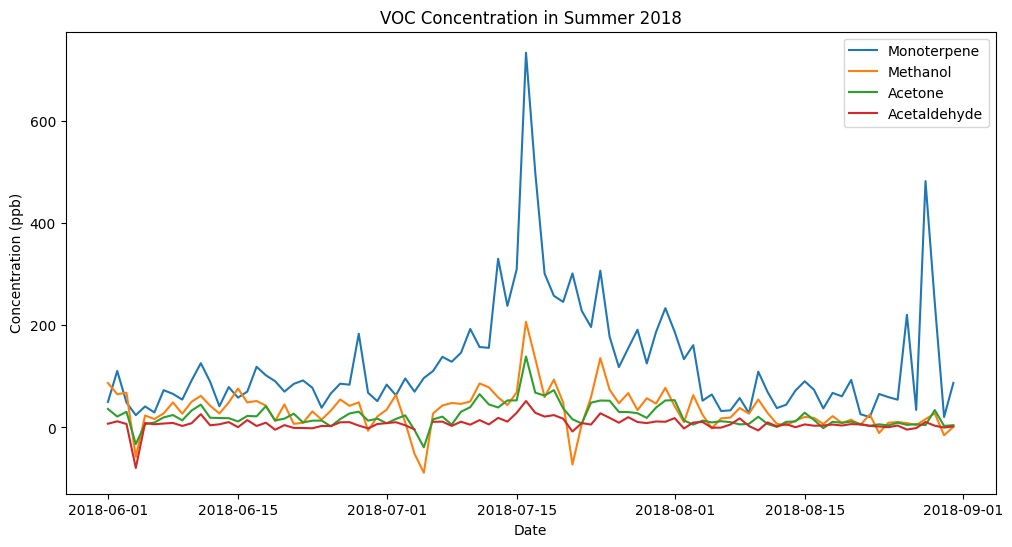

In [35]:
# plot the time series of the VOC concentration in summer 2018
plt.figure(figsize=(12, 6))
plt.plot(voc_summer_2018['monoterpene_flux'], label='Monoterpene')
plt.plot(voc_summer_2018['methanol_flux'], label='Methanol')
plt.plot(voc_summer_2018['acetone_flux'], label='Acetone')
plt.plot(voc_summer_2018['acetaldehyde_flux'], label='Acetaldehyde')
plt.title('VOC Concentration in Summer 2018')
plt.xlabel('Date')
plt.ylabel('Concentration (ppb)')
plt.legend()
plt.show()

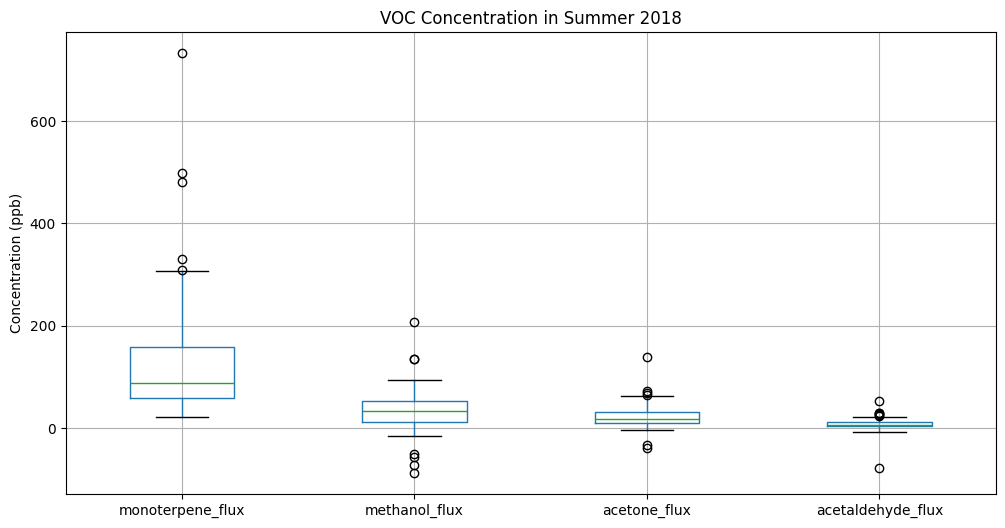

In [36]:
# plot the time series of the VOC concentration in summer 2018 as a boxplot
plt.figure(figsize=(12, 6))
voc_summer_2018.boxplot(column=['monoterpene_flux', 'methanol_flux', 'acetone_flux', 'acetaldehyde_flux'])
plt.title('VOC Concentration in Summer 2018')
plt.ylabel('Concentration (ppb)')
plt.show()